In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('airfoil_self_noise.dat',sep="\t",header=None)

In [3]:
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

SyntaxError: invalid syntax (<ipython-input-3-6e63e7a8db4d>, line 1)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
### first Do train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


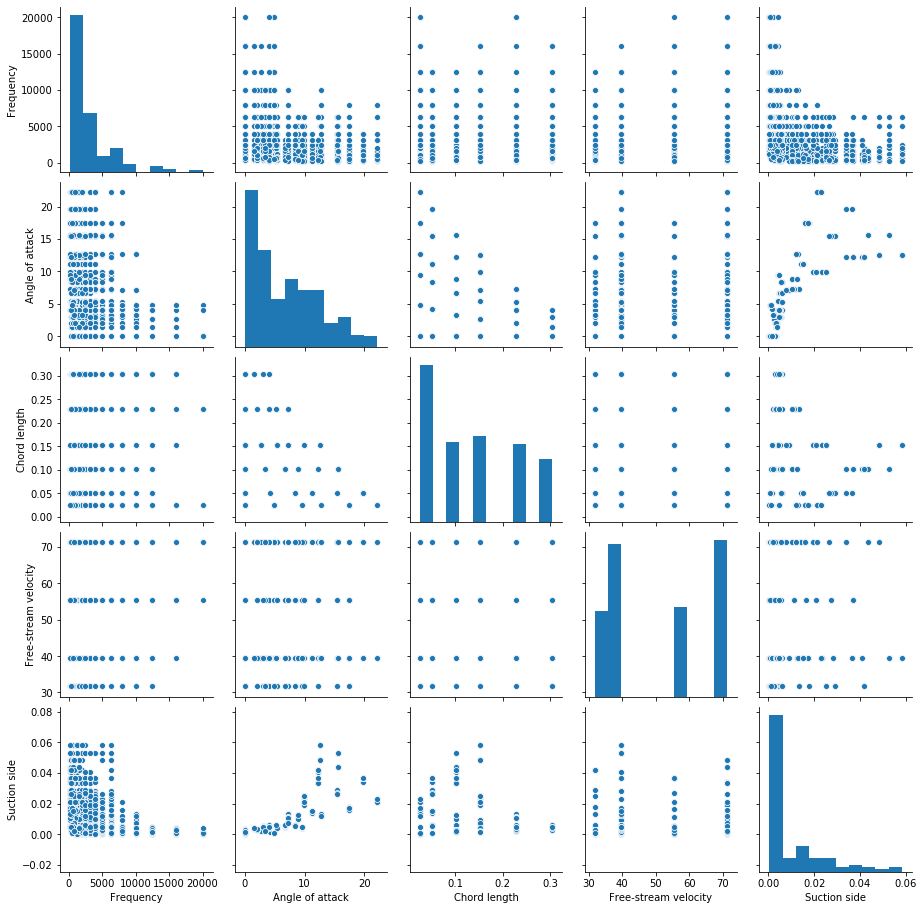

In [11]:
import seaborn as sns
sns.pairplot(X_train)

In [13]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


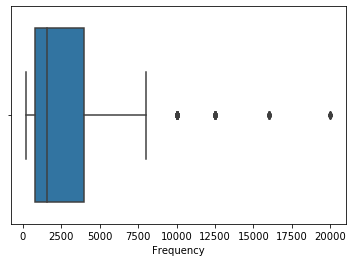

In [14]:
sns.boxplot(X_train['Frequency'])

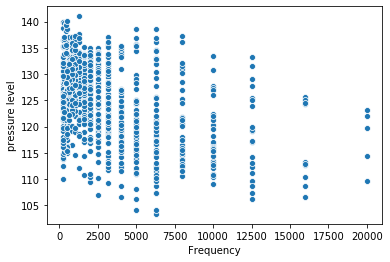

In [15]:
sns.scatterplot(X_train['Frequency'],y)

In [16]:
len(df['pressure level'].unique())

1456

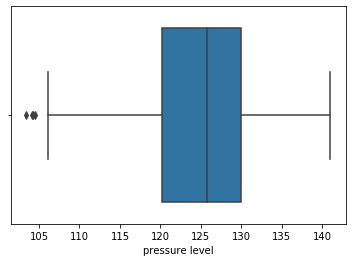

In [17]:
sns.boxplot(df['pressure level'])

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [21]:
!pip install flask

  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


ERROR: pandas-profiling 2.5.0 requires kaggle==1.5.6, which is not installed.
ERROR: pandas-profiling 2.5.0 has requirement jinja2==2.11.1, but you'll have jinja2 3.1.2 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement pandas==0.25.3, but you'll have pandas 1.2.5 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement phik==0.9.9, but you'll have phik 0.9.10 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement requests==2.22.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement tangled-up-in-unicode==0.0.3, but you'll have tangled-up-in-unicode 0.0.4 which is incompatible.

  Using cached MarkupSafe-2.1.1-cp37-cp37m-win_amd64.whl (17 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 1.5.0
    Uninstalling importlib-metadata-1.5.0:
      Successfully uninstalled importlib-metadata-1.5.0
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1



ERROR: pandas-profiling 2.5.0 has requirement tqdm==4.42.0, but you'll have tqdm 4.43.0 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement visions==0.2.2, but you'll have visions 0.2.3 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\ramesh kumar\\.conda\\envs\\machinelearning\\lib\\site-packages\\~arkupsafe\\_speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [20]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

In [23]:
dict={"Frequency":500,
      "Angle of attack":11.2,
      "Chord length":0.0508,
      "Free-stream velocity":71.3,
      "Suction side":0.014072}

In [24]:
dict.values()

dict_values([500, 11.2, 0.0508, 71.3, 0.014072])

In [25]:
list(dict.values())

[500, 11.2, 0.0508, 71.3, 0.014072]

In [26]:
pickled_model.predict(list(dict.values()))

C:\Users\Ramesh Kumar\.conda\envs\MachineLearning\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: Expected 2D array, got 1D array instead:
array=[5.0000e+02 1.1200e+01 5.0800e-02 7.1300e+01 1.4072e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
[list(dict.values())]

[[500, 11.2, 0.0508, 71.3, 0.014072]]

In [28]:
pickled_model.predict([list(dict.values())])

C:\Users\Ramesh Kumar\.conda\envs\MachineLearning\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([130.90434613])

In [29]:
pickled_model.predict([list(dict.values())])[0]

C:\Users\Ramesh Kumar\.conda\envs\MachineLearning\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


130.90434613349115

In [30]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143
